# Real estate price

In [170]:
import pandas as pd 

localPath = "datasets/real_estate.csv"
df = pd.read_csv(localPath)

In [171]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [172]:
df.shape  # (414, 8) 414 rows and 8 columns

(414, 8)

In [173]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
print(df.shape)
df.head()

(414, 5)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [174]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [176]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.


In [178]:
# split the data set into features and target

#split the data into training(70%) and testing(30%) data
from sklearn.model_selection import train_test_split
Y = df['Y house price of unit area']
X = df.drop(['Y house price of unit area'], axis=1) #drop the Y and rest of column

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


print(414*0.7) # 289.8 70% of 414 = 289
print(414*0.3) # 124.2 30% of 414 = 125

print(X_train.shape) # (289, 4)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

289.79999999999995
124.19999999999999
(289, 4)
(125, 4)
(289,)
(125,)


#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

              Year       Age  Distance    Stores     Price
Year      1.000000  0.049171  0.016519 -0.005586  0.081545
Age       0.049171  1.000000  0.025622  0.049593 -0.210567
Distance  0.016519  0.025622  1.000000 -0.602519 -0.673613
Stores   -0.005586  0.049593 -0.602519  1.000000  0.571005
Price     0.081545 -0.210567 -0.673613  0.571005  1.000000

 Available color maps to use in the heatmap:
['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gn

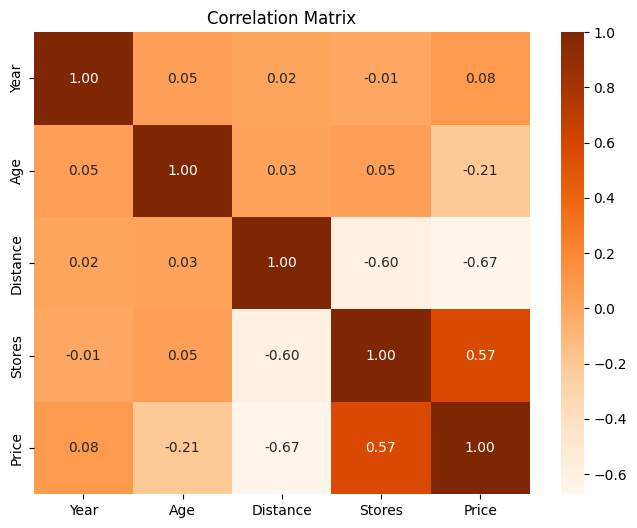

In [179]:
# check co-relation between features

import seaborn as sns
import matplotlib.pyplot as plt


# Define aliases for the column names because the original names are too long
aliases = {
    'X1 transaction date': 'Year',
    'X2 house age': 'Age',
    'X3 distance to the nearest MRT station': 'Distance',
    'X4 number of convenience stores': 'Stores',
    'Y house price of unit area': 'Price'
}

# Rename the columns
df = df.rename(columns=aliases)

# Compute correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)



colorMaps = plt.colormaps()
print('\n Available color maps to use in the heatmap:')
print(colorMaps)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [180]:
#utils

def showPredictionResultPrint(Y_test, Y_pred):
    #make a dataframe to compare the actual and predicted values
    df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred, 'Difference': Y_test - Y_pred})
    #drop the index column 
    df = df.reset_index(drop=True)
    #print the dataframe
    print(df.head(10).to_string(index=False))
    

def showPlot(Y_test, Y_pred, title):
    # Scatter plot for predicted values
    plt.scatter(Y_test, Y_pred, color='blue', label="Actual", marker='x')
    # Scatter plot for actual values
    plt.scatter(Y_test, Y_test, color='red', label="Predicted", marker='+')
    # line
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', label="Ideal Line")
    # Display the legend
    plt.legend()
    # Set the title
    plt.title(title)
    # Show the plot
    plt.show()


def buildEquationAndLegend(model, feature_names):
    # make the feature names alias a, b, c, d
    alias_map = {}
    for i, col in enumerate(feature_names):
        alias_map[col] = chr(97 + i)  # 'a' starts at 97 in ASCII
    
    # Extract the coefficients and intercept
    coef = model.coef_
    intercept = model.intercept_

    # Build the equation
    equation = f'y = {intercept:.2f}'

    for i, col in enumerate(feature_names):
        alias = alias_map[col]
        equation += f" + {model.coef_[i]:.2f}{alias}"
    
    # return the equation and alias map
    return (equation, alias_map)


def plotCoEfficients(elements, model):
    # Plot the coefficients
    plot = sns.barplot(x=list(elements), y=model.coef_, color='maroon')
    plot.set(xlabel='Features', ylabel='Coefficient Value')
    plt.title('Feature Coefficients')




#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.


Score of the model: 0.5643696003958152

Intercept: -5560.4518677600345

Coefficients: [ 2.78410294 -0.23257624 -0.00558695  1.27087806]

The equation of the linear-regression-model is y = -5560.45 + 2.78a + -0.23b + -0.01c + 1.27d
X1 transaction date = a
X2 house age = b
X3 distance to the nearest MRT station = c
X4 number of convenience stores = d


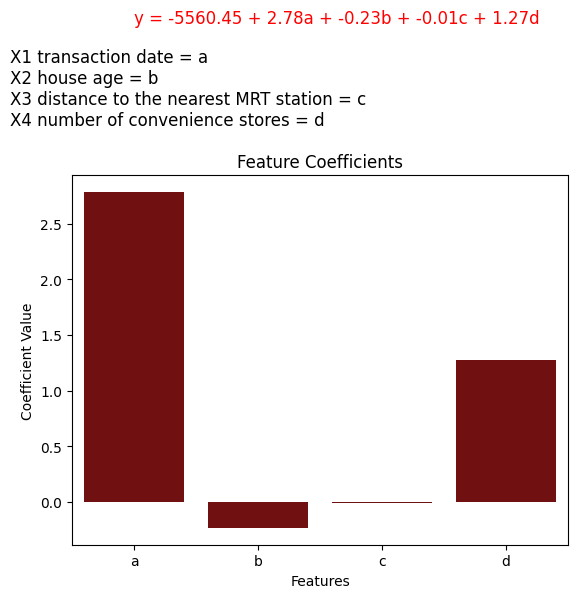

Shape of test samples prediction - result $(125,)
 Actual  Predicted  Difference
   45.1  50.235234   -5.135234
   42.3  44.481659   -2.181659
   52.2  43.687320    8.512680
   37.3  38.529902   -1.229902
   22.8  28.069635   -5.269635
   36.3  44.183736   -7.883736
   53.0  42.203229   10.796771
   51.4  44.917559    6.482441
   16.1  27.339578  -11.239578
   59.0  53.344873    5.655127


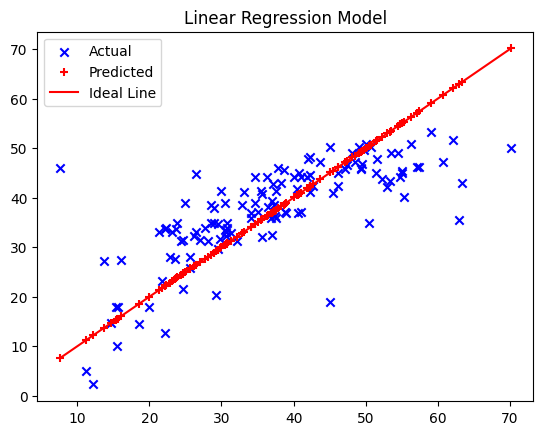

In [181]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

# Make predictions
Y_pred_linear = model.predict(X_test)

#score
print('Score of the model: {}\n'.format(model.score(X_test, Y_test)))

# intercept and coefficients
print('Intercept: {}\n'.format(model.intercept_))
print('Coefficients: {}\n'.format(model.coef_))

# build the equation and alias map
equation, alias_map = buildEquationAndLegend(model, X.columns)
print("The equation of the linear-regression-model is {}".format(equation))


# Plot the coefficients
plotCoEfficients(alias_map.values(), model)
plt.text(0, 4.3, equation, fontsize=12, ha='left', fontdict={'color': 'red'})
legendText = ''
for i, col in enumerate(X.columns):
    print(f'{col} = {list(alias_map.values())[i]}')
    legendText += f'{col} = {list(alias_map.values())[i]}\n'

plt.text(-1, 3.2, legendText, fontsize=12, ha='left')
plt.show()



print('Shape of test samples prediction - result ${}'.format(Y_pred_linear.shape))
# show the results in a dataframe
showPredictionResultPrint(Y_test, Y_pred_linear)
showPlot(Y_test, Y_pred_linear, 'Linear Regression Model')



**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

In [182]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


degree = 3

poly = PolynomialFeatures(degree=degree)

# Transform the features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_poly, Y_train)

print('Score of the model: {}\n'.format(model.score(X_test_poly, Y_test)))

# Make predictions
Y_pred_poly = model.predict(X_test_poly)

# Show the prediction results
showPredictionResultPrint(Y_test, Y_pred_poly)


Score of the model: 0.6195906293975494

 Actual  Predicted  Difference
   45.1  55.220262  -10.120262
   42.3  42.802135   -0.502135
   52.2  52.840349   -0.640349
   37.3  47.018229   -9.718229
   22.8  22.263049    0.536951
   36.3  41.490309   -5.190309
   53.0  43.155095    9.844905
   51.4  45.287529    6.112471
   16.1  18.145301   -2.045301
   59.0  56.620646    2.379354


In [183]:
# we will calculate feature by this factorial function
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n-1)

total features 4
resultantFeature 35.0
transform poly shape 35 and 35
All feature calculation are equal = True
check cofficient length 35
intercept is -2735.422454826732
Polynomial Equation:  Y = -2735.4 + (0.0)X^0 + (-0.0)X^1 + (0.0)X^2 + (0.0)X^3 + (-0.0)X^4 + (-0.0)X^5 + (0.3)X^6 + (-0.0)X^7 + (-0.1)X^8 + (-5.3)X^9 + (-0.5)X^10 + (-48.9)X^11 + (0.0)X^12 + (3.1)X^13 + (-0.1)X^14 + (0.0)X^15 + (-0.0)X^16 + (0.0)X^17 + (0.0)X^18 + (0.0)X^19 + (0.0)X^20 + (0.0)X^21 + (-0.0)X^22 + (-0.0)X^23 + (-0.0)X^24 + (0.0)X^25 + (0.0)X^26 + (0.0)X^27 + (0.0)X^28 + (0.0)X^29 + (0.0)X^30 + (-0.0)X^31 + (-0.0)X^32 + (0.0)X^33 + (0.1)X^34
[np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(0.0), np.float64(-0.0), np.float64(-0.0), np.float64(0.3), np.float64(-0.0), np.float64(-0.1), np.float64(-5.3), np.float64(-0.5), np.float64(-48.9), np.float64(0.0), np.float64(3.1), np.float64(-0.1), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), n

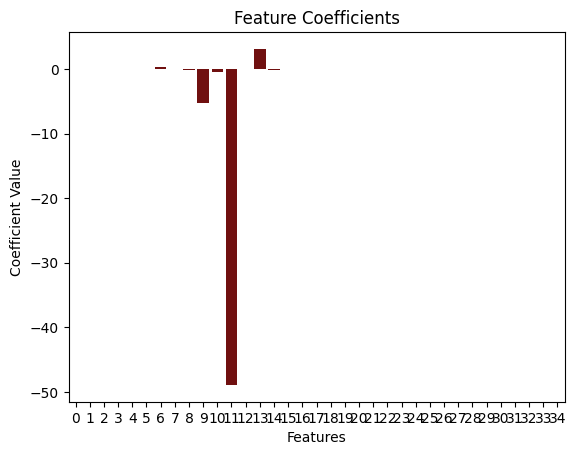

In [184]:
# Build the equation
# degree = 3 # The degree of the polynomial
# so the equation will be Y = a + bX + cX^2 + dX^3

# total features = 4
n = X_test.shape[1] #because there are 4 columns in dataset that are being trained
print('total features {}'.format(n))
d = degree

resultFeature = factorial(n+d) / (factorial(n)*factorial(d))
print('resultantFeature {}'.format(resultFeature))


# we can cross-check the feature count from our transformPoly
transformPolyFeatureFromTrain = X_train_poly.shape[1] #only focus about shape of feature (column)
transformPolyFeatureFromTest = X_test_poly.shape[1]
print('transform poly shape {} and {}'.format(transformPolyFeatureFromTrain, transformPolyFeatureFromTrain)) 

# we can check both, because both are converted to poly with our calculated resultFeature
print('All feature calculation are equal = {}'.format(resultFeature == transformPolyFeatureFromTrain == transformPolyFeatureFromTest))


# Extract the coefficients (including the intercept)
coefficients = model.coef_
intercept = model.intercept_

# we can also verify that cofficients has exact same number of elements like the previous 3 values
print("check cofficient length {}".format(coefficients.size))
print("intercept is {}".format(intercept))

# Print the polynomial equation
equation = f'Y = {intercept:.1f}'
for i, coef in enumerate(coefficients[0:], start=0): 
    equation += f' + ({coef:.1f})X^{i}'

print("Polynomial Equation: ", equation)


# make all coefficients to 1 decimal point
coefficients = [round(coef, 1) for coef in coefficients]
print(coefficients)
# bar plot of all coefficients
plotCoEfficients(range(len(coefficients)), model)



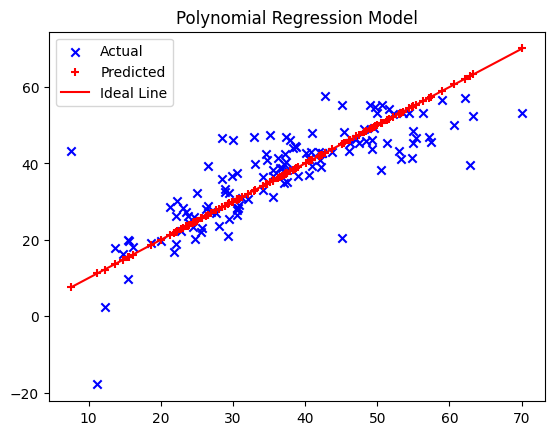

In [185]:
# Show the plot
showPlot(Y_test, Y_pred_poly, 'Polynomial Regression Model')

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

In [186]:
# model evaluation

from sklearn.metrics import mean_squared_error, r2_score

#calculate for linear regression
mse_linear = mean_squared_error(Y_test, Y_pred_linear)
r2_linear = r2_score(Y_test, Y_pred_linear)

#calculate for polynomial regression
mse_poly = mean_squared_error(Y_test, Y_pred_poly)
r2_poly = r2_score(Y_test, Y_pred_poly)


print('Linear Regression:')
print('Mean Squared Error:', mse_linear)
print('R2 Score:', r2_linear)

print('\nPolynomial Regression with degree ({}):'.format(degree))
print('Mean Squared Error:', mse_poly)
print('R2 Score:', r2_poly)





Linear Regression:
Mean Squared Error: 72.84834417663703
R2 Score: 0.5643696003958152

Polynomial Regression with degree (3):
Mean Squared Error: 63.6140011873473
R2 Score: 0.6195906293975494




#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


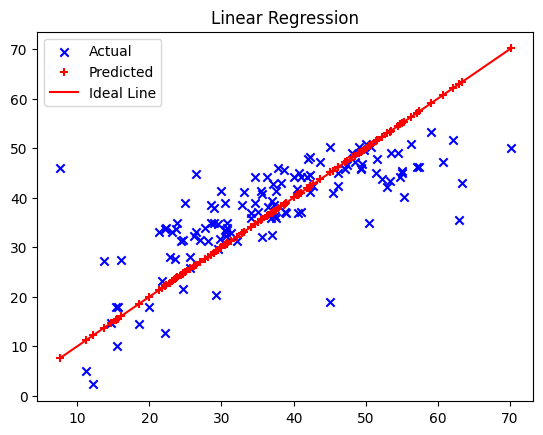

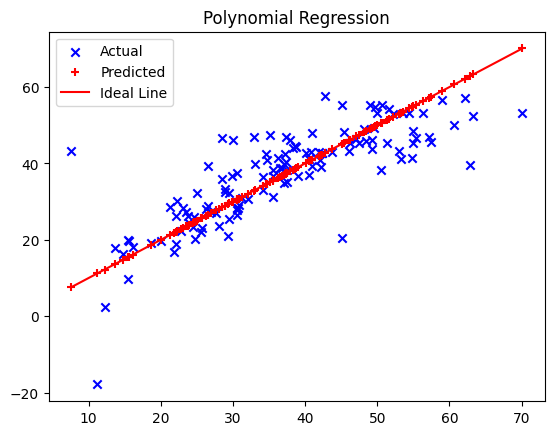

In [187]:
showPlot(Y_test, Y_pred_linear, 'Linear Regression')
showPlot(Y_test, Y_pred_poly, 'Polynomial Regression')

### Polynomial 2, 3, 4 degree results

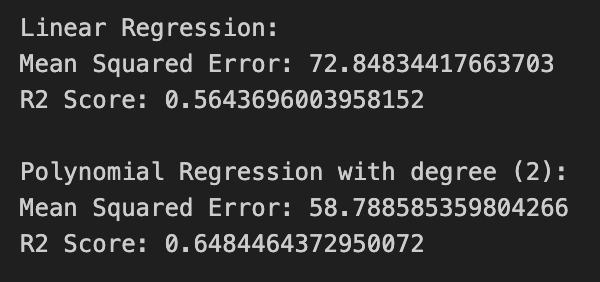
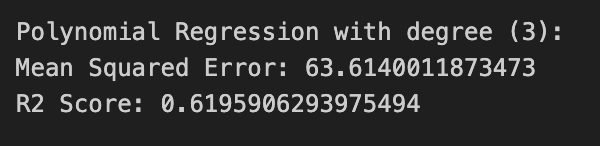
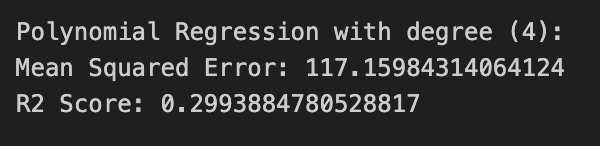